        Date   Close     MA20     MA50
0 2018-03-09  4811.0  4703.35  4607.22
1 2018-03-12  4840.0  4728.70  4621.64
2 2018-03-13  4878.0  4750.60  4636.82
3 2018-03-14  4822.0  4770.15  4650.88
4 2018-03-15  4904.0  4786.15  4662.54

取得行数: 645 行


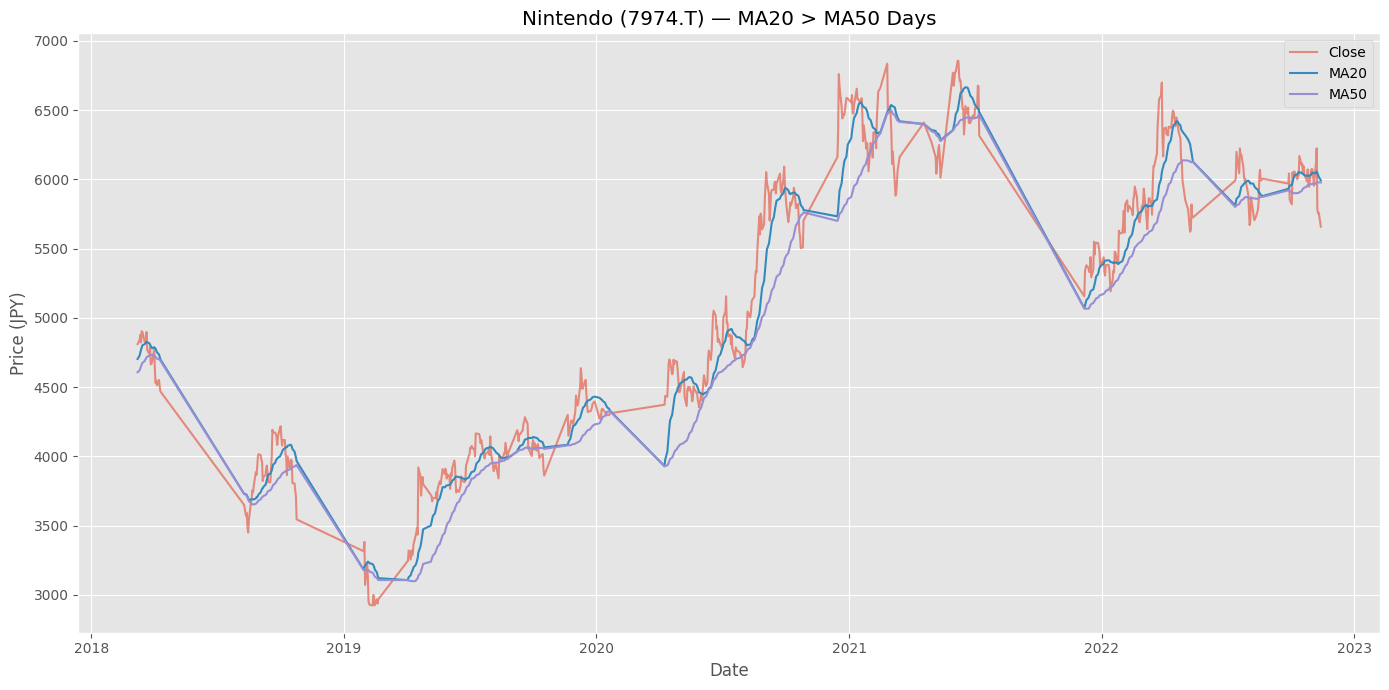

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# ======================================================
# 1. SQLite から SELECT 結果を pandas DataFrame に取り込む
# ======================================================
db_path = "nintendo.db"

query = """
SELECT Date, Close, MA20, MA50
FROM nintendo
WHERE MA20 > MA50
ORDER BY Date;
"""

conn = sqlite3.connect(db_path)

df = pd.read_sql(query, conn, parse_dates=["Date"])
conn.close()

print(df.head())
print(f"\n取得行数: {len(df)} 行")

# ======================================================
# 2. 可視化（Close, MA20, MA50 を描画）
# ======================================================
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(df["Date"], df["Close"], label="Close", alpha=0.6)
ax.plot(df["Date"], df["MA20"], label="MA20", linewidth=1.5)
ax.plot(df["Date"], df["MA50"], label="MA50", linewidth=1.5)

ax.set_title("Nintendo (7974.T) — MA20 > MA50 Days")
ax.set_xlabel("Date")
ax.set_ylabel("Price (JPY)")
ax.legend()

plt.tight_layout()
plt.show()


# ゴールデンクロス: 短期移動平均（MA20）が中期移動平均（MA50）を下から上へ抜ける瞬間

強調部分（MA20 > MA50）: 645 行


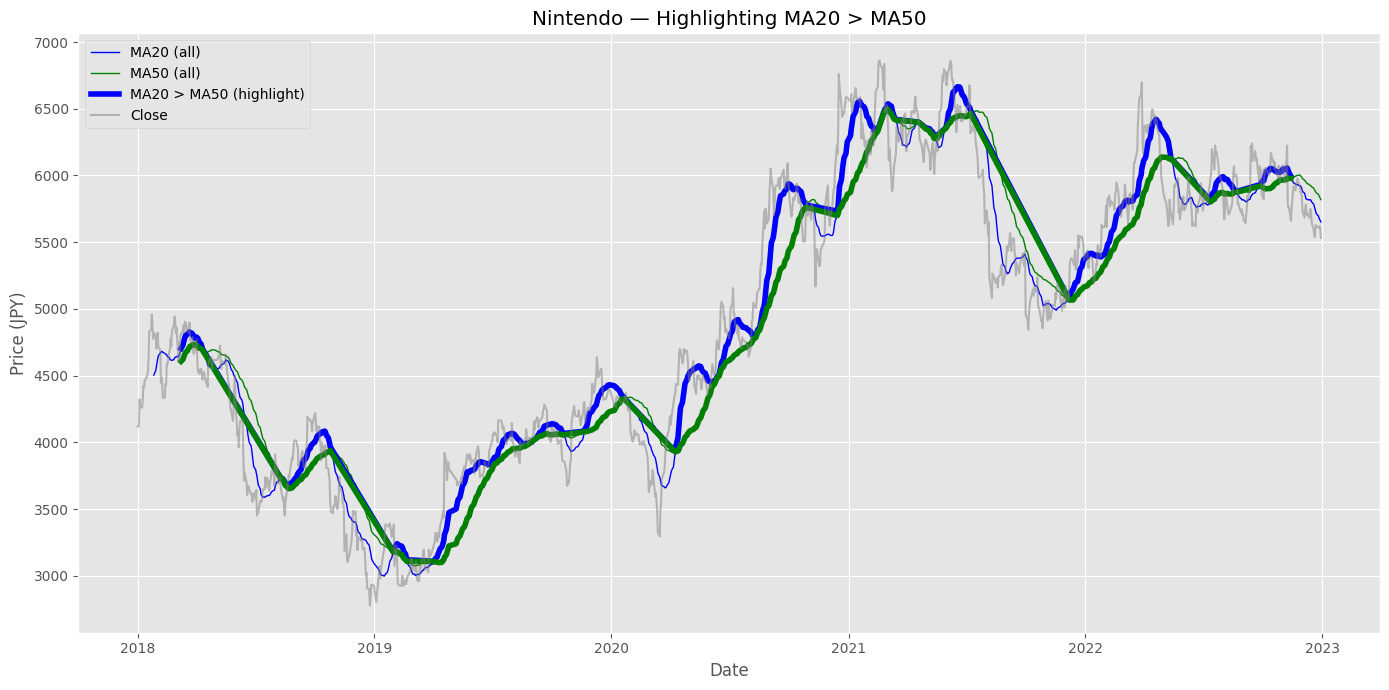

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# ======================================================
# 1. SQLite からデータを取得
# ======================================================
db_path = "nintendo.db"

# 全データを取得（条件付き描画のため）
query = """
SELECT Date, Close, MA20, MA50
FROM nintendo
ORDER BY Date;
"""

conn = sqlite3.connect(db_path)
df = pd.read_sql(query, conn, parse_dates=["Date"])
conn.close()

# 条件に合う行だけ抽出
cond_df = df[df["MA20"] > df["MA50"]]

print(f"強調部分（MA20 > MA50）: {len(cond_df)} 行")

# ======================================================
# 2. 可視化（条件部分を太線にする）
# ======================================================
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(14, 7))

# ---- 通常線（細め） ----
ax.plot(df["Date"], df["MA20"], label="MA20 (all)", color="blue", linewidth=1)
ax.plot(df["Date"], df["MA50"], label="MA50 (all)", color="green", linewidth=1)

# ---- 条件に合う部分だけ太線で上書き（強調） ----
ax.plot(cond_df["Date"], cond_df["MA20"], color="blue", linewidth=4, label="MA20 > MA50 (highlight)")
ax.plot(cond_df["Date"], cond_df["MA50"], color="green", linewidth=4)

# 終値（参考）
ax.plot(df["Date"], df["Close"], label="Close", color="gray", alpha=0.5)

ax.set_title("Nintendo — Highlighting MA20 > MA50")
ax.set_xlabel("Date")
ax.set_ylabel("Price (JPY)")
ax.legend()

plt.tight_layout()
plt.show()
